In [0]:
import numpy as np 
import pandas as pd

In [0]:
import shutil 
from tqdm import tqdm
import torch
import torchvision
import matplotlib.pyplot as plt
import time
import copy

import os

In [0]:
%matplotlib inline

In [0]:
from google.colab import files, drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
red_data = pd.read_csv('/content/drive/My Drive/ВСТУПИТЕЛЬНОЕ/red/winequality-red.csv', sep = ',', delimiter= ';')

In [0]:
# Делим данные на X и y

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
rX, ry = red_data.iloc[:,:-1],red_data.iloc[:,-1]

In [12]:
rX

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [0]:
rX_train, rX_test, ry_train, ry_test = train_test_split(rX, ry, test_size=0.2, random_state=123)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
import numpy as np
from sklearn.model_selection import  cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Обычно, Umap, неплохо проэцирует на плоскость данные.

In [0]:
import umap

In [18]:
reducer = umap.UMAP(random_state=42)
reducer.fit(rX)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [19]:
embedding = reducer.transform(rX)

assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1599, 2)

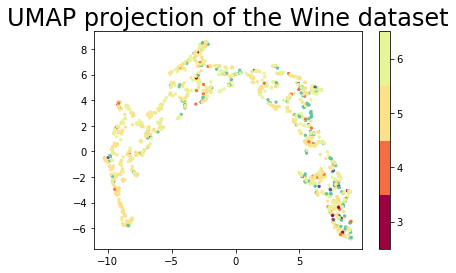

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=ry, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(3,8)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Wine dataset', fontsize=24);


In [0]:
trans = umap.UMAP(n_neighbors=7, random_state=42).fit(rX)

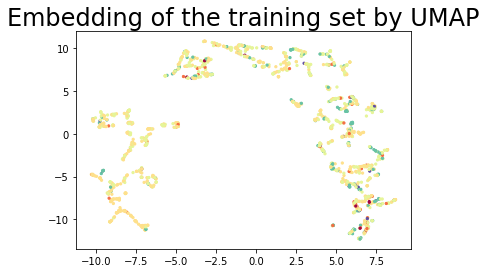

In [22]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=ry, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [0]:
# Ничего хорошего на первый взгляд не видно.

In [24]:
svc = SVC().fit(trans.embedding_, ry)
knn = KNeighborsClassifier().fit(trans.embedding_, ry)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
svc.score(trans.transform(rX), ry), knn.score(trans.transform(rX), ry)

(0.5628517823639775, 0.6691682301438399)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os

In [27]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
red_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
red_data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [30]:
red_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [31]:
red_data.shape

(1599, 12)

In [0]:
X = red_data.iloc[:, 1:11].values
y = red_data.iloc[:, 11].values

In [33]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [0]:
import pandas_profiling as pp

In [0]:
#Описание различных статистик

In [36]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
# Подробное описание различных статистик

In [38]:
pp.ProfileReport(red_data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [39]:
red_data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [0]:
import seaborn as sns

In [0]:
# распределение классов по чистоте

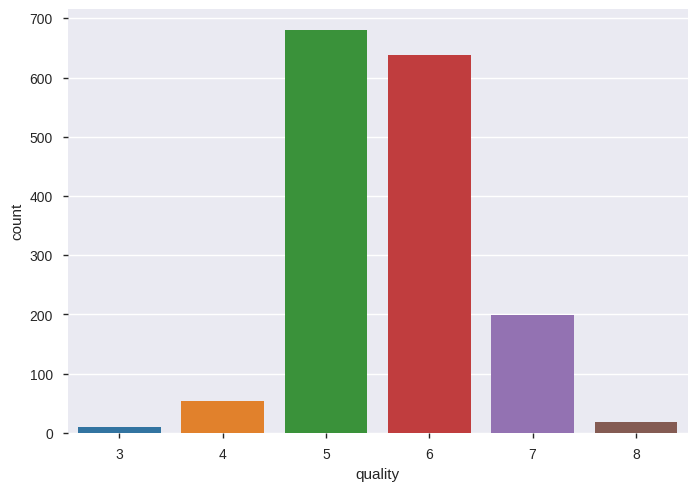

In [42]:
sns.countplot(x="quality", data=red_data)

In [0]:
#Попробуем кластеризировать на 3 класса и снова оборатимся к Umap

In [0]:
bins=[0,4,6,10]
labels=[0,1,2]
red_data['wine_quality']=pd.cut(red_data['quality'],bins=bins,labels=labels)

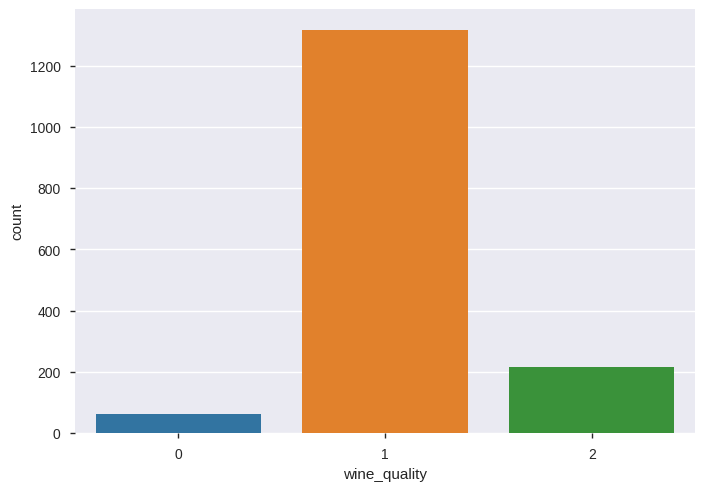

In [45]:
sns.countplot(x="wine_quality", data=red_data)

In [46]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [0]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] 
label = ['wine_quality']

In [0]:
# Перемешаем данные

In [0]:
from sklearn.utils import shuffle

In [0]:
red_data = shuffle(red_data)
X = red_data[features]
y = red_data[label]

In [0]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
print('Training Feature Shape', X_train.shape)
print('Validation Feature Shape', X_val.shape)

print('Label Training Shape', y_train.shape)
print('Label Validation Shape', y_val.shape)

Training Feature Shape (1279, 11)
Validation Feature Shape (320, 11)
Label Training Shape (1279, 1)
Label Validation Shape (320, 1)


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# z = (x - u) / s

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val)

In [56]:
reducer = umap.UMAP(random_state=42)
reducer.fit(X_train)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [57]:
embedding = reducer.transform(X_train)

assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1279, 2)

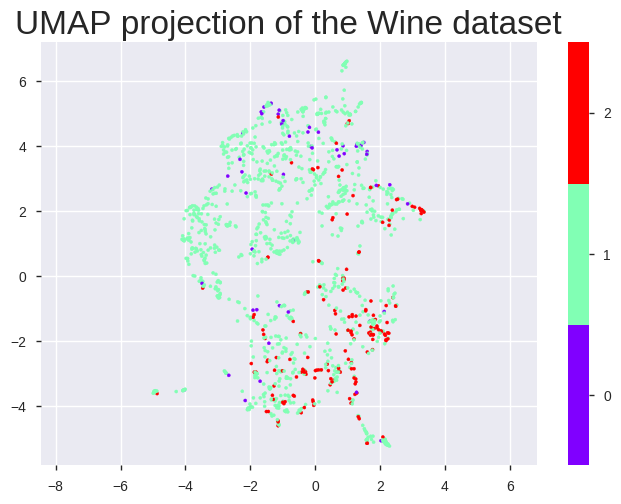

In [58]:
plt.scatter(embedding[:, 0], embedding[:, 1],cmap='rainbow', c=y_train['wine_quality'], s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
plt.title('UMAP projection of the Wine dataset', fontsize=24);

In [0]:
# Более оптимистичная картина

In [0]:
import xgboost as xgb

In [0]:
# XGB

In [0]:
xgb_cls = xgb.XGBClassifier(
    # max_depth=10, n_jobs=100, verbosity=3,
                            objective='multi:softmax')

In [63]:
xgb_cls.fit(rX_train, ry_train, early_stopping_rounds=4, eval_set=[(rX_train, ry_train), (rX_test, ry_test)], eval_metric='mlogloss')

[0]	validation_0-mlogloss:1.67816	validation_1-mlogloss:1.69691
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 4 rounds.
[1]	validation_0-mlogloss:1.58443	validation_1-mlogloss:1.61796
[2]	validation_0-mlogloss:1.50345	validation_1-mlogloss:1.54833
[3]	validation_0-mlogloss:1.43356	validation_1-mlogloss:1.49077
[4]	validation_0-mlogloss:1.37214	validation_1-mlogloss:1.44096
[5]	validation_0-mlogloss:1.31823	validation_1-mlogloss:1.39717
[6]	validation_0-mlogloss:1.2705	validation_1-mlogloss:1.35938
[7]	validation_0-mlogloss:1.2274	validation_1-mlogloss:1.3227
[8]	validation_0-mlogloss:1.18871	validation_1-mlogloss:1.29011
[9]	validation_0-mlogloss:1.1537	validation_1-mlogloss:1.26204
[10]	validation_0-mlogloss:1.12263	validation_1-mlogloss:1.23655
[11]	validation_0-mlogloss:1.09347	validation_1-mlogloss:1.21405
[12]	validation_0-mlogloss:1.06612	validation_1-mlogloss:1.19538
[13

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
p = xgb_cls.predict(rX_test)

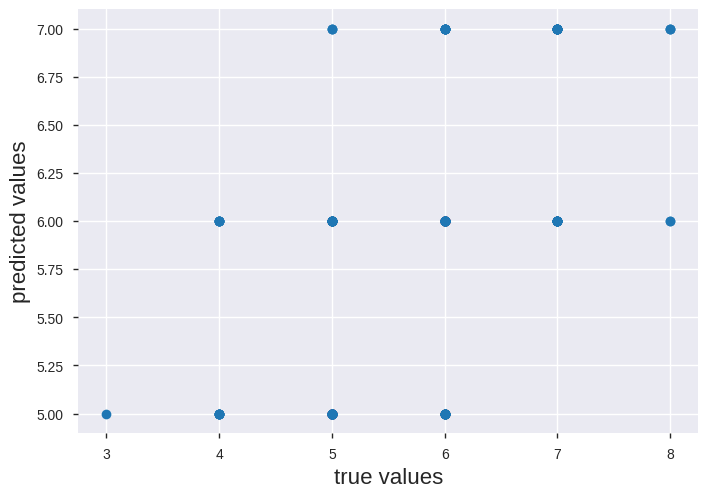

In [65]:
plt.plot(ry_test, p, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [0]:
# Ниже везде будет использоваться данная метрика оценки качества: классы ранжированны, и поэтому, отклонение от значения класса важно.

In [67]:
sum(abs(p - ry_test))/len(p)

0.44375

In [68]:
rX_train.iloc[172].values

array([ 7.3    ,  0.49   ,  0.1    ,  2.6    ,  0.068  ,  4.     ,
       14.     ,  0.99562,  3.3    ,  0.47   , 10.5    ])

In [69]:
pip install catboost

     |████████████████████████████████| 63.6MB 47kB/s 


In [0]:
from catboost import CatBoostClassifier

In [0]:
# СatBoost от яндекса. Часто неплохо работает "из коробки".

In [0]:
import catboost

In [0]:
model = CatBoostClassifier(
    iterations=6000,
    learning_rate=0.01,
    loss_function='MultiClass',
    task_type='GPU',
    eval_metric='Accuracy',
    early_stopping_rounds = 1000
  )

In [74]:
model.fit(
      rX_train, ry_train,
      eval_set=(rX_test, ry_test),
      plot=True,
      verbose=10
  );  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6043784	test: 0.5000000	best: 0.5000000 (0)	total: 10.5ms	remaining: 1m 2s
10:	learn: 0.6450352	test: 0.5625000	best: 0.5625000 (10)	total: 99.4ms	remaining: 54.1s
20:	learn: 0.6528538	test: 0.5562500	best: 0.5656250 (17)	total: 194ms	remaining: 55.2s
30:	learn: 0.6520719	test: 0.5625000	best: 0.5687500 (23)	total: 292ms	remaining: 56.3s
40:	learn: 0.6567631	test: 0.5687500	best: 0.5718750 (37)	total: 400ms	remaining: 58.1s
50:	learn: 0.6544175	test: 0.5656250	best: 0.5718750 (37)	total: 484ms	remaining: 56.5s
60:	learn: 0.6606724	test: 0.5750000	best: 0.5750000 (58)	total: 574ms	remaining: 55.9s
70:	learn: 0.6645817	test: 0.5781250	best: 0.5781250 (66)	total: 659ms	remaining: 55s
80:	learn: 0.6661454	test: 0.5750000	best: 0.5781250 (66)	total: 741ms	remaining: 54.1s
90:	learn: 0.6731822	test: 0.5750000	best: 0.5781250 (66)	total: 844ms	remaining: 54.8s
100:	learn: 0.6731822	test: 0.5781250	best: 0.5781250 (66)	total: 933ms	remaining: 54.5s
110:	learn: 0.6755278	test: 0.581

In [0]:
p = model.predict(rX_test)

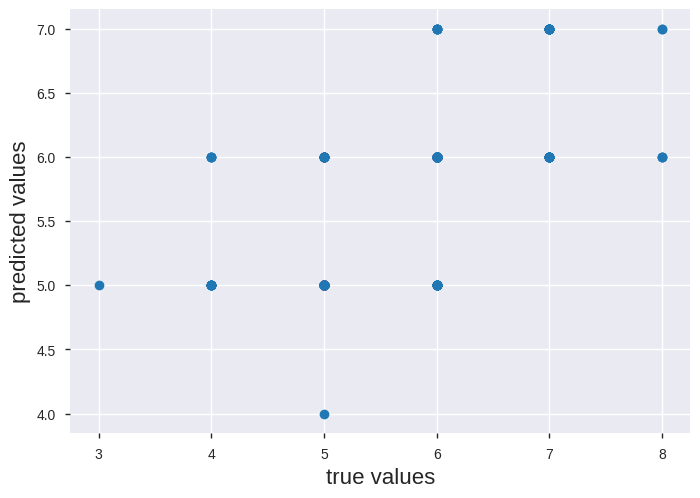

In [76]:
plt.plot(ry_test, p, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [77]:
sum(abs(p[:,0] - ry_test))/len(p)

0.365625

In [0]:
import torch

In [0]:
# Простая нейросетка на pytorch

In [0]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = torch.nn.Linear(11, 1201)
        self.fc2 = torch.nn.Linear(1201, 5505)
        self.fc3 = torch.nn.Linear(5505, 1201)
        self.fc4 = torch.nn.Linear(1201, 505)
        self.fc5 = torch.nn.Linear(505, 6)

        self.act1 = torch.nn.ReLU()
        self.act2 = torch.nn.Sigmoid()

    # def forward(self, x):
    #     x = self.fc1(x)
    #     x = self.act1(x)
    #     x = self.fc2(x)
    #     x = self.act1(x)
    #     x = self.fc3(x)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act1(x)
        x = self.fc3(x)
        x = self.act1(x)
        x = self.fc4(x)
        x = self.act1(x)
        x = self.fc5(x)
        return x


model = Net()

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [83]:
rX_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1076,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
582,11.7,0.49,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
172,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2
779,7.1,0.52,0.03,2.6,0.076,21.0,92.0,0.99745,3.50,0.60,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1122,6.3,0.47,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3
1346,6.1,0.59,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4
1406,8.2,0.24,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9
1389,6.7,0.48,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.7


In [0]:
scaler = StandardScaler()
scaler.fit(rX_train)
rX_test = scaler.transform(rX_test)
rX_train = scaler.transform(rX_train)

In [85]:
rX_train

array([[ 0.89358298, -1.13946293,  1.48264243, ..., -1.03607885,
         0.40597574,  0.93295636],
       [-0.53104385,  0.86341667, -0.57810487, ...,  1.23111916,
         0.23188892, -0.47443764],
       [ 1.91931429, -0.19365867,  1.12201165, ..., -0.7769705 ,
        -1.33489252, -1.13122151],
       ...,
       [-0.07516327, -1.58454728,  0.34923141, ..., -0.58263925,
         1.62458353,  0.46382503],
       [-0.92993936, -0.24929422, -1.29936643, ..., -1.35996428,
        -0.7546031 , -0.66209018],
       [-0.98692444,  0.19579014, -0.68114224, ...,  0.71290247,
        -0.23234262,  1.21443516]])

In [0]:
test_accuracy_history = []
test_loss_history = []
val_accuracy_history = []
val_loss_history = []
def train_model(model, loss, optimizer, scheduler, num_epochs):
    best_model = model
    best_acc = 0
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = torch.tensor(rX_train, requires_grad=False)
                label = ry_train.to_numpy().reshape(-1) - 3
                
                scheduler.step()
                model.train()  
            else:
                dataloader = torch.tensor(rX_test)
                label = ry_test.to_numpy().reshape(-1) - 3
                
                model.eval()   

            running_loss = 0.
            running_acc = 0.

            arr = np.arange(len(label))
            arr = np.random.shuffle(arr)
            dataloader1 = dataloader[arr][0]
            label1 = label[arr][0]

            for i in range(0,len(dataloader1),4):

                inputs = dataloader1[i:i+4]
                inputs = inputs.to(device)


                labels = torch.tensor(label1[i:i+4])
                labels = labels.to(device)

                optimizer.zero_grad()


                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs.float())
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)



                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / (len(dataloader1)/4)
            epoch_acc = running_acc / (len(dataloader1)/4)
            
            if (phase=='train'):
                test_accuracy_history.append(epoch_acc)
                test_loss_history.append(epoch_loss)
            elif (phase=='val'):
                val_accuracy_history.append(epoch_acc)
                val_loss_history.append(epoch_loss)
                if epoch_acc > best_acc:
                  best_model = model
        
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)
    model = best_model
    return model

In [87]:
train_model(model, loss, optimizer, scheduler, num_epochs=100);

Epoch 0/99:


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 1.2282 Acc: 0.5499
val Loss: 1.3300 Acc: 0.4344
Epoch 1/99:
train Loss: 1.1348 Acc: 0.5541
val Loss: 1.1376 Acc: 0.4938
Epoch 2/99:
train Loss: 1.0287 Acc: 0.5736
val Loss: 1.0663 Acc: 0.5094
Epoch 3/99:
train Loss: 0.9721 Acc: 0.5869
val Loss: 1.0547 Acc: 0.5375
Epoch 4/99:
train Loss: 0.9423 Acc: 0.5838
val Loss: 1.0712 Acc: 0.5437
Epoch 5/99:
train Loss: 0.9219 Acc: 0.5929
val Loss: 1.0714 Acc: 0.5563
Epoch 6/99:
train Loss: 0.8820 Acc: 0.6078
val Loss: 1.0916 Acc: 0.5813
Epoch 7/99:
train Loss: 0.8581 Acc: 0.6187
val Loss: 1.0679 Acc: 0.5969
Epoch 8/99:
train Loss: 0.8121 Acc: 0.6445
val Loss: 1.1432 Acc: 0.5813
Epoch 9/99:
train Loss: 0.8069 Acc: 0.6502
val Loss: 1.1651 Acc: 0.5375
Epoch 10/99:
train Loss: 0.7482 Acc: 0.6698
val Loss: 1.3258 Acc: 0.5844
Epoch 11/99:
train Loss: 0.7284 Acc: 0.6690
val Loss: 1.2064 Acc: 0.5625
Epoch 12/99:
train Loss: 0.6786 Acc: 0.7097
val Loss: 1.3051 Acc: 0.5781
Epoch 13/99:
train Loss: 0.6752 Acc: 0.7042
val Loss: 1.4404 Acc: 0.5656


In [0]:
p = model(torch.tensor(rX_test).float().to(device)).argmax(dim=1) + 3

In [0]:
p1 = p.to('cpu').detach().numpy()

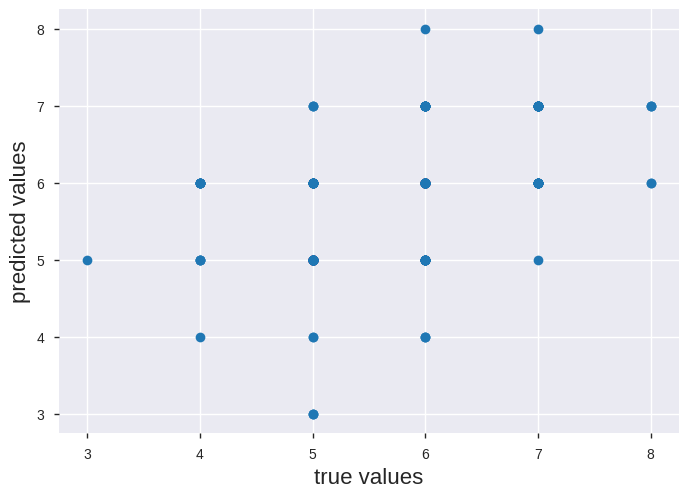

In [90]:
plt.plot(ry_test, p1, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [91]:
sum(abs(p1 - ry_test))/len(p1)

0.446875

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfr=RandomForestRegressor(n_estimators=40,random_state=0)
rfr.fit(rX_train,ry_train)

y_pred=np.matrix.round(rfr.predict(rX_test))

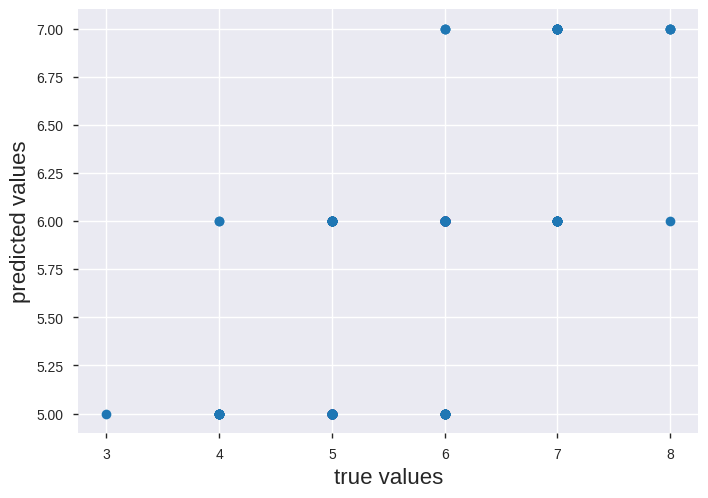

In [94]:
plt.plot(ry_test, y_pred, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [95]:
sum(abs(y_pred - ry_test))/len(y_pred)

0.346875

In [96]:
rX_train

array([[ 0.89358298, -1.13946293,  1.48264243, ..., -1.03607885,
         0.40597574,  0.93295636],
       [-0.53104385,  0.86341667, -0.57810487, ...,  1.23111916,
         0.23188892, -0.47443764],
       [ 1.91931429, -0.19365867,  1.12201165, ..., -0.7769705 ,
        -1.33489252, -1.13122151],
       ...,
       [-0.07516327, -1.58454728,  0.34923141, ..., -0.58263925,
         1.62458353,  0.46382503],
       [-0.92993936, -0.24929422, -1.29936643, ..., -1.35996428,
        -0.7546031 , -0.66209018],
       [-0.98692444,  0.19579014, -0.68114224, ...,  0.71290247,
        -0.23234262,  1.21443516]])

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfс=RandomForestClassifier(n_estimators=40,random_state=0)
rfс.fit(rX_train,ry_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_predс=np.matrix.round(rfс.predict(rX_test))

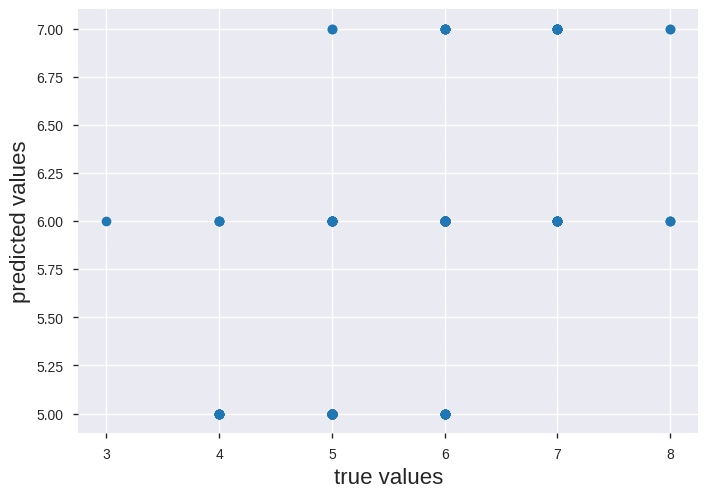

In [100]:
plt.plot(ry_test, y_predс, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [101]:
sum(abs(y_pred - ry_test))/len(y_pred)

0.346875

In [0]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [103]:
adaClf = AdaBoostClassifier(algorithm = 'SAMME', random_state=12)
adaClf.fit(rX_train,ry_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=12)

In [0]:
p_pred = adaClf.predict(rX_test)

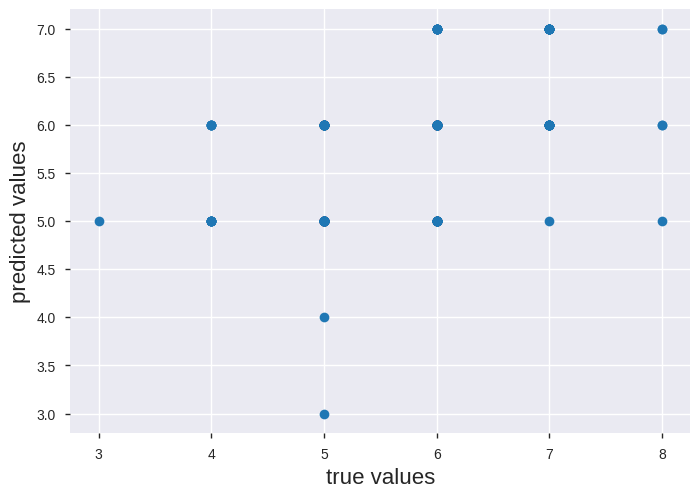

In [105]:
plt.plot(ry_test, p_pred, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [106]:
sum(abs(p_pred - ry_test))/len(p_pred)

0.5

In [107]:
GBClf = GradientBoostingClassifier(random_state=27)
GBClf.fit(rX_train,ry_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=27, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
p1_pred = GBClf.predict(rX_test)

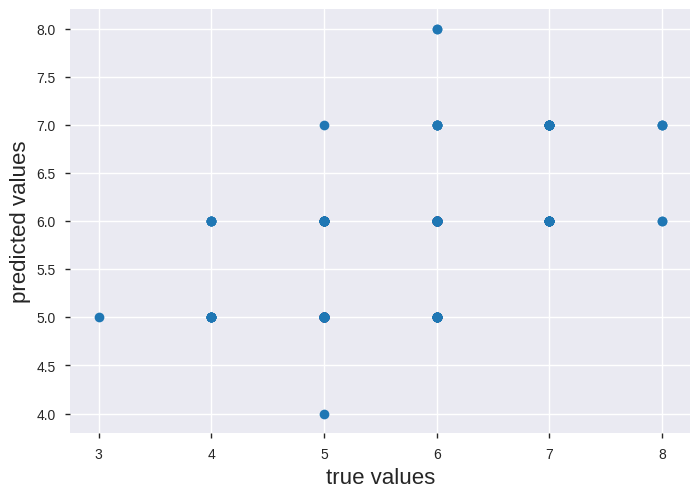

In [109]:
plt.plot(ry_test, p1_pred, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [110]:
sum(abs(p1_pred - ry_test))/len(p1_pred)

0.4125

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [0]:
logClf = LogisticRegression(random_state=0) 

In [113]:
logClf.fit(rX_train, ry_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
p2_pred = logClf.predict(rX_test)

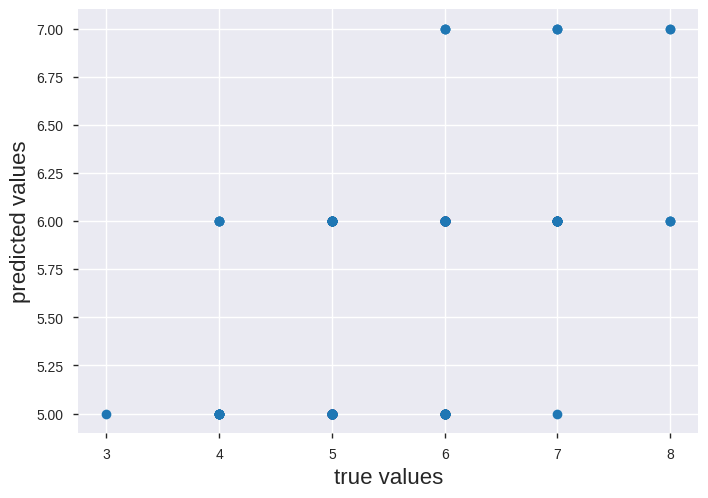

In [115]:
plt.plot(ry_test, p2_pred, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [116]:
sum(abs(p2_pred - ry_test))/len(p1_pred)

0.478125

In [0]:
svmClf = SVC(probability=True, random_state=0)

In [118]:
svmClf.fit(rX_train, ry_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
p3_pred = svmClf.predict(rX_test)

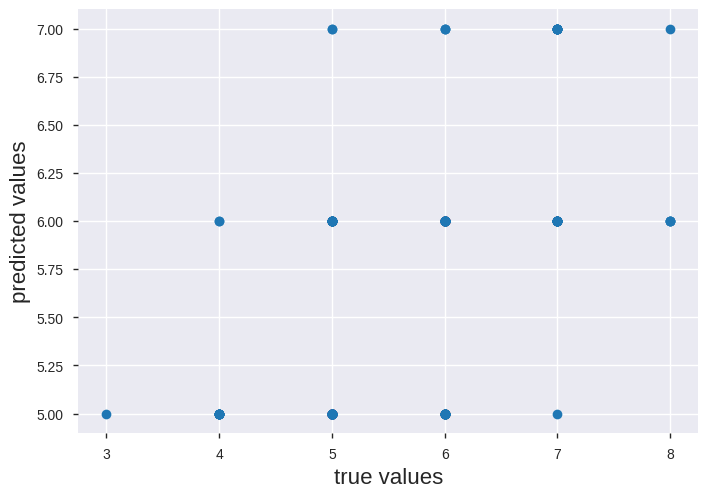

In [120]:
plt.plot(ry_test, p3_pred, linestyle='', marker='o')
plt.xlabel('true values', fontsize = 16)
plt.ylabel('predicted values', fontsize = 16)
plt.show()

In [121]:
sum(abs(p3_pred - ry_test))/len(p1_pred)

0.459375

In [0]:
# сохраняем параметры "лучшей" модели.

In [0]:
import dill

In [0]:
dill.dump(rfr, open('/content/drive/My Drive/ВСТУПИТЕЛЬНОЕ/red' + "param","wb"))

In [0]:
# Проверка

In [0]:
model_1 = dill.load(open('/content/drive/My Drive/ВСТУПИТЕЛЬНОЕ/red' + "param","rb"))

In [0]:
y_pred1=np.matrix.round(model_1.predict(rX_test))

In [128]:
sum(abs(y_pred1 - ry_test))/len(y_pred1)

0.346875

In [0]:
dill.dump(scaler, open('/content/drive/My Drive/ВСТУПИТЕЛЬНОЕ/scaler',"wb"))